In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/bitcoin_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3174,2023-05-27,26720.181641,26888.882812,26621.140625,26868.353516,26868.353516,7892015141
3175,2023-05-28,26871.158203,28193.449219,26802.751953,28085.646484,28085.646484,14545229578
3176,2023-05-29,28075.591797,28432.039062,27563.876953,27745.884766,27745.884766,15181308984
3177,2023-05-30,27745.123047,28044.759766,27588.501953,27702.349609,27702.349609,13251081851


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_72115/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2014-09-17,0.004144
1,2014-09-18,0.003655
2,2014-09-19,0.003216
3,2014-09-20,0.003425
4,2014-09-21,0.003275
...,...,...
3174,2023-05-27,0.396064
3175,2023-05-28,0.414128
3176,2023-05-29,0.409086
3177,2023-05-30,0.408440


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((3119, 60, 1), (3119, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(3119, 60, 1)

In [12]:
X[0], y[0]

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.00293862]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 204ms/step


(array([[0.00662419]], dtype=float32), array([0.00311297]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[624.4986]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[387.88198853]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.00414359],
        [0.00365546],
        [0.00321557],
        [0.00342492],
        [0.0032753 ],
        [0.00332473],
        [0.0038239 ],
        [0.00363714],
        [0.00346454],
        [0.00335845],
        [0.00328567],
        [0.00295417],
        [0.00292874],
        [0.00309905],
        [0.00304965],
        [0.00292288],
        [0.00269198],
        [0.00223721],
        [0.00211322],
        [0.00225521],
        [0.00234585],
        [0.00259445],
        [0.0027738 ],
        [0.0027224 ],
        [0.00273334],
        [0.00297447],
        [0.00315054],
        [0.0033057 ],
        [0.00321523],
        [0.00303393],
        [0.00305177],
        [0.0031658 ],
        [0.00313766],
        [0.00303822],
        [0.00309209],
        [0.00304287],
        [0.00267573],
        [0.00267466],
        [0.00251033],
        [0.00262063],
        [0.00259518],
        [0.00266387],
        [0.00233701],
        [0.00248116],
        [0.00237752],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

98/98 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((3119, 1), (3119, 1), (3119, 1), (3119, 1), (3119, 1), (3119, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((3119, 1), (3119, 1), (3119, 1), (3119, 1), (3119, 1), (3119, 1))

In [22]:
y.shape

(3119, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2014-11-16,387.881989,624.498291,347.566315,364.091064,327.031372,258.275330,150.001541,365.388397,292.920074,266.090454,211.598480,88.810242,321.641968
2014-11-17,387.407990,635.597900,337.241455,359.790710,328.973419,259.538940,152.273483,377.087738,292.335632,265.099426,216.859390,92.500008,324.907043
2014-11-18,375.197998,635.149536,334.208344,355.729858,329.067078,259.959808,152.795639,376.615540,293.493713,265.128845,218.566101,93.570892,325.574066
2014-11-19,380.554993,623.614136,333.645508,348.108704,323.037781,251.981934,144.201202,364.452515,286.578491,261.889282,208.729996,86.025177,316.503876
2014-11-20,357.839996,628.675171,331.270660,346.773651,324.166962,252.745483,145.132324,369.792450,286.512451,261.926056,211.004440,87.658836,318.193146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,26868.353516,26499.773438,27220.011719,26796.269531,26710.019531,26741.322266,26814.115234,26771.087891,26832.890625,26651.037109,26663.451172,26573.482422,26714.070312
2023-05-28,28085.646484,26651.431641,27413.501953,26907.314453,26890.148438,26927.742188,26997.664062,26921.173828,27007.138672,26851.322266,26842.230469,26743.152344,26888.878906
2023-05-29,27745.884766,27891.957031,27991.185547,27518.712891,28019.193359,28051.628906,28095.605469,28146.964844,27905.181641,27822.310547,27980.027344,27867.582031,27997.779297


# CNN Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

predictions_df = predictions_df[['Actual', 'LSTM_15', 'LSTM_30', 'GRU_15', 'GRU_1']]

In [26]:
predictions_df

,Actual,LSTM_15,LSTM_30,GRU_15,GRU_1
Date,,,,,
2014-11-16,0.003113,0.000610,0.002605,0.002922,0.003036
2014-11-17,0.003106,0.000639,0.002624,0.003000,0.003216
2014-11-18,0.002925,0.000641,0.002630,0.003026,0.003209
2014-11-19,0.003004,0.000550,0.002510,0.002879,0.003022
2014-11-20,0.002667,0.000567,0.002522,0.002913,0.003104
...,...,...,...,...,...
2023-05-27,0.396064,0.399649,0.400027,0.396563,0.409494
2023-05-28,0.414128,0.402374,0.402825,0.399224,0.411804
2023-05-29,0.409086,0.419450,0.419691,0.416156,0.430673


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((2495, 4), (2495,), (312, 4), (312,), (312, 4), (312,))

In [29]:
meta_training_X

,LSTM_15,LSTM_30,GRU_15,GRU_1
Date,,,,
2014-11-16,0.000610,0.002605,0.002922,0.003036
2014-11-17,0.000639,0.002624,0.003000,0.003216
2014-11-18,0.000641,0.002630,0.003026,0.003209
2014-11-19,0.000550,0.002510,0.002879,0.003022
2014-11-20,0.000567,0.002522,0.002913,0.003104
...,...,...,...,...
2021-09-10,0.691784,0.689654,0.686147,0.714635
2021-09-11,0.673047,0.671556,0.666879,0.691254
2021-09-12,0.675485,0.673757,0.669412,0.696179


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 4, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 4, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 4, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((2495, 4, 1), (312, 4, 1), (312, 4, 1))

In [31]:
meta_training_X[0]

array([[0.00061009],
       [0.0026046 ],
       [0.00292201],
       [0.00303592]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((2495, 1), (312, 1), (312, 1))

In [33]:
meta_training_y[0]

array([0.00311297])

In [34]:
# Create a CNN meta model that will take the input of the predictions of the other models
# The input shape is (6, 1) and the output shape is (1, 1)

meta_model = keras.Sequential([
    keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'ReLU', input_shape = (4, 1)),
    keras.layers.MaxPooling1D(pool_size = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation = 'ReLU'),
    keras.layers.Dense(1, activation = 'linear')
])

meta_model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'mse', metrics = ['mae', 'mse'])

In [35]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 500, validation_data = (meta_validation_X, meta_validation_y), batch_size = 256)

Epoch 1/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0676 - mae: 0.1443 - mse: 0.0676 - val_loss: 0.4804 - val_mae: 0.6647 - val_mse: 0.4804
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0624 - mae: 0.1367 - mse: 0.0624 - val_loss: 0.4499 - val_mae: 0.6428 - val_mse: 0.4499
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0584 - mae: 0.1308 - mse: 0.0584 - val_loss: 0.4219 - val_mae: 0.6218 - val_mse: 0.4219
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0544 - mae: 0.1264 - mse: 0.0544 - val_loss: 0.3970 - val_mae: 0.6027 - val_mse: 0.3970
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0512 - mae: 0.1225 - mse: 0.0512 - val_loss: 0.3736 - val_mae: 0.5847 - val_mse: 0.3736
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0481 - mae: 0.1186 - mse: 0.0481 - val_loss: 0.3569 - val_mae: 0.5714 - val_mse: 0.3569
Epoch 7/500
10/10 [===

In [36]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

10/10 [==============================] - 0s 390us/step


,Actual,Predicted
0,0.332861,0.332785
1,0.314349,0.334443
2,0.312540,0.317298
3,0.337630,0.313777
4,0.351183,0.337296
...,...,...
307,0.396064,0.395959
308,0.414128,0.398504
309,0.409086,0.415859
310,0.408440,0.412680


In [37]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [38]:
test_results

,Actual,Predicted
0,22236.976531,22231.931641
1,21007.473037,22342.066406
2,20887.281414,21203.345703
3,22553.734405,20969.457031
4,23453.923209,22531.589844
...,...,...
307,26434.847549,26427.863281
308,27634.615470,26596.886719
309,27299.745212,27749.583984
310,27256.836820,27538.474609


In [39]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [40]:
test_results

,Actual,Predicted
2022-07-24,22236.976531,22231.931641
2022-07-25,21007.473037,22342.066406
2022-07-26,20887.281414,21203.345703
2022-07-27,22553.734405,20969.457031
2022-07-28,23453.923209,22531.589844
...,...,...
2023-05-27,26434.847549,26427.863281
2023-05-28,27634.615470,26596.886719
2023-05-29,27299.745212,27749.583984
2023-05-30,27256.836820,27538.474609


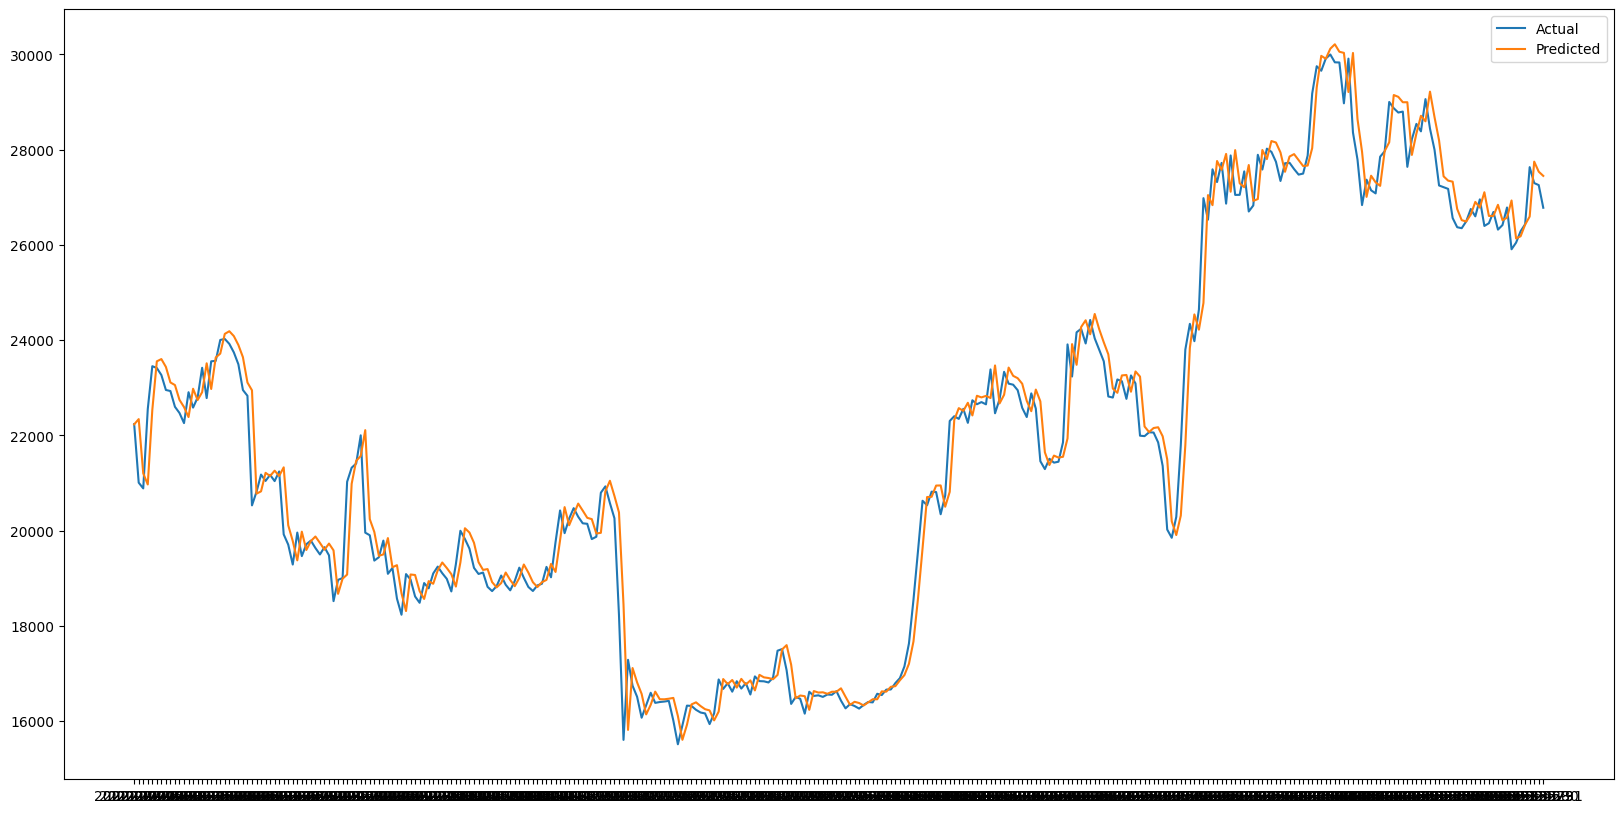

In [41]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [42]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 604.179492693852, MAE: 414.24757797926094
